# This notebook contains all the exercises of the Xarray.

# Exercise 1: Exploring a New Dataset
Load the Xarray tutorial dataset rasm.

Inspect the Dataset object and list all the variables and dimensions.

Select the Tair variable (air temperature).

Print the attributes, dimensions, and coordinates of Tair.

In [2]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import pooch

xr.set_options(keep_attrs=True, display_expand_data=False)
np.set_printoptions(threshold=10, edgeitems=2)

In [134]:
ds=xr.tutorial.open_dataset("rasm").load()

In [59]:
ds

<xarray.Dataset> Size: 17MB
Dimensions:  (time: 36, y: 205, x: 275)
Coordinates:
  * time     (time) object 288B 1980-09-16 12:00:00 ... 1983-08-17 00:00:00
    xc       (y, x) float64 451kB 189.2 189.4 189.6 189.7 ... 17.4 17.15 16.91
    yc       (y, x) float64 451kB 16.53 16.78 17.02 17.27 ... 28.01 27.76 27.51
Dimensions without coordinates: y, x
Data variables:
    Tair     (time, y, x) float64 16MB nan nan nan nan ... 28.66 28.19 28.21
Attributes:
    title:                     /workspace/jhamman/processed/R1002RBRxaaa01a/l...
    institution:               U.W.
    source:                    RACM R1002RBRxaaa01a
    output_frequency:          daily
    output_mode:               averaged
    convention:                CF-1.4
    references:                Based on the initial model of Liang et al., 19...
    comment:                   Output from the Variable Infiltration Capacity...
    nco_openmp_thread_number:  1
    NCO:                       netCDF Operators version 4.7.9 (Homepage = htt...
    history:                   Fri Aug  7 17:57:38 2020: ncatted -a bounds,,d...

In [135]:
air_temperature=ds['Tair']
air_temperature

<xarray.DataArray 'Tair' (time: 36, y: 205, x: 275)> Size: 16MB
nan nan nan nan nan nan nan nan ... 28.99 29.19 29.64 29.8 28.66 28.19 28.21
Coordinates:
  * time     (time) object 288B 1980-09-16 12:00:00 ... 1983-08-17 00:00:00
    xc       (y, x) float64 451kB 189.2 189.4 189.6 189.7 ... 17.4 17.15 16.91
    yc       (y, x) float64 451kB 16.53 16.78 17.02 17.27 ... 28.01 27.76 27.51
Dimensions without coordinates: y, x
Attributes:
    units:           C
    long_name:       Surface air temperature
    type_preferred:  double
    time_rep:        instantaneous

In [136]:
ds['Tair'].attrs

{'units': 'C',
 'long_name': 'Surface air temperature',
 'type_preferred': 'double',
 'time_rep': 'instantaneous'}

In [137]:
ds['Tair'].dims

('time', 'y', 'x')

In [138]:
ds['Tair'].coords

Coordinates:
  * time     (time) object 288B 1980-09-16 12:00:00 ... 1983-08-17 00:00:00
    xc       (y, x) float64 451kB 189.2 189.4 189.6 189.7 ... 17.4 17.15 16.91
    yc       (y, x) float64 451kB 16.53 16.78 17.02 17.27 ... 28.01 27.76 27.51

# Exercise 2: Data Selection and Indexing

Select a subset of the Tair data for the date 1980-07-01 and latitude 70.0.

Create a time slice for the entire latitude range between January and March of 1980.

Plot the selected time slice as a line plot.

In [139]:

print(ds.time.attrs)
print(ds.xc.attrs)
print(ds.yc.attrs)

{'long_name': 'time', 'type_preferred': 'int'}
{'long_name': 'longitude of grid cell center', 'units': 'degrees_east'}
{'long_name': 'latitude of grid cell center', 'units': 'degrees_north'}


In [140]:
# create a subset of the tair data for date 1980-07-01 and latitude 70

subset = air_temperature.sel(time='1980-09-16', y=70)
subset


<xarray.DataArray 'Tair' (time: 1, x: 275)> Size: 2kB
nan nan nan nan nan nan nan nan nan nan ... nan nan nan nan nan nan nan nan nan
Coordinates:
  * time     (time) object 8B 1980-09-16 12:00:00
    xc       (x) float64 2kB 168.0 168.0 168.1 168.2 ... 319.5 319.6 319.8 319.9
    yc       (x) float64 2kB 24.91 25.23 25.54 25.86 ... 40.05 39.69 39.33 38.98
Dimensions without coordinates: x
Attributes:
    units:           C
    long_name:       Surface air temperature
    type_preferred:  double
    time_rep:        instantaneous

In [141]:
# Create a time slice for the entire latitude range between January and March of 1980.

Jan_March = air_temperature.sel(time=slice('1980-01-01', '1980-03-31'))
Jan_March

<xarray.DataArray 'Tair' (time: 0, y: 205, x: 275)> Size: 0B

Coordinates:
  * time     (time) object 0B 
    xc       (y, x) float64 451kB 189.2 189.4 189.6 189.7 ... 17.4 17.15 16.91
    yc       (y, x) float64 451kB 16.53 16.78 17.02 17.27 ... 28.01 27.76 27.51
Dimensions without coordinates: y, x
Attributes:
    units:           C
    long_name:       Surface air temperature
    type_preferred:  double
    time_rep:        instantaneous

In [ ]:
# Plot the selected time slice as a line plot.
import matplotlib.pyplot as plt
Jan_March.plot(dim='x')
plt.show()

TypeError: No numeric data to plot.

# Start of Lab-6 Exercises

In [ ]:
# Load data set from "https://github.com/opengeos/datasets/releases/download/netcdf/sea_surface_temperature.nc"

file_path = "https://github.com/opengeos/datasets/releases/download/netcdf/sea_surface_temperature.nc"
data = pooch.retrieve(url=file_path, known_hash=None, fname="sea_surface_temperature.nc", path="data")

In [4]:
ds=xr.open_dataset(data)
ds

d:\Trainings\newgeoenv\Lib\site-packages\xarray\conventions.py:200: SerializationWarning: variable 'sst' has multiple fill values {-999000000.0, -9999.0} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


<xarray.Dataset> Size: 149MB
Dimensions:  (lon: 720, lat: 360, time: 72)
Coordinates:
  * lon      (lon) float64 6kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat      (lat) float64 3kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 576B 2010-01-01 2010-02-01 ... 2015-12-01
Data variables:
    sst      (time, lat, lon) float64 149MB ...

In [5]:
sea_surface=ds.sst

In [6]:
sea_surface.attrs

{'long_name': 'Sea Surface Temperature',
 'units': 'degrees Celsius',
 'standard_name': 'sea_surface_temperature',
 'valid_range': array([-2., 35.])}

In [7]:
sea_surface.dims

('time', 'lat', 'lon')

In [165]:
sea_surface.coords

Coordinates:
  * lon      (lon) float64 6kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat      (lat) float64 3kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 576B 2010-01-01 2010-02-01 ... 2015-12-01

In [178]:
equator=sea_surface.sel(time = '2010-07-01', lat=0, method='nearest')
equator

<xarray.DataArray 'sst' (lon: 720)> Size: 6kB
[720 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 6kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
    lat      float64 8B 0.25
    time     datetime64[ns] 8B 2010-07-01
Attributes:
    long_name:      Sea Surface Temperature
    units:          degrees Celsius
    standard_name:  sea_surface_temperature
    valid_range:    [-2. 35.]

In [8]:
# Time slice
time_slice = sea_surface.sel(time=slice('2010-01-01', '2010-03-31'))
time_slice

<xarray.DataArray 'sst' (time: 3, lat: 360, lon: 720)> Size: 6MB
[777600 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 6kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat      (lat) float64 3kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 24B 2010-01-01 2010-02-01 2010-03-01
Attributes:
    long_name:      Sea Surface Temperature
    units:          degrees Celsius
    standard_name:  sea_surface_temperature
    valid_range:    [-2. 35.]

In [ ]:
# Plot the time slice as a line plot, showing the latitude-averaged SST over time.
time_slice.mean(dim='lat').plot()
plt.show()

NameError: name 'time_slice' is not defined

# Exercise 3: Performing Arithmetic Operations
Compute the mean SST over the entire time range (2010-2015) to obtain the average sea surface temperature for each spatial location.

Calculate the temperature anomalies by subtracting the computed mean from the original SST values. This helps understand how SST deviates from the mean during the time period.

Plot both the mean SST and the anomalies on separate plots to visualize spatial temperature patterns and deviations. You can select a specific time to display the anomalies.

This exercise introduces arithmetic operations on the dataset, focusing on the concept of temperature anomalies.

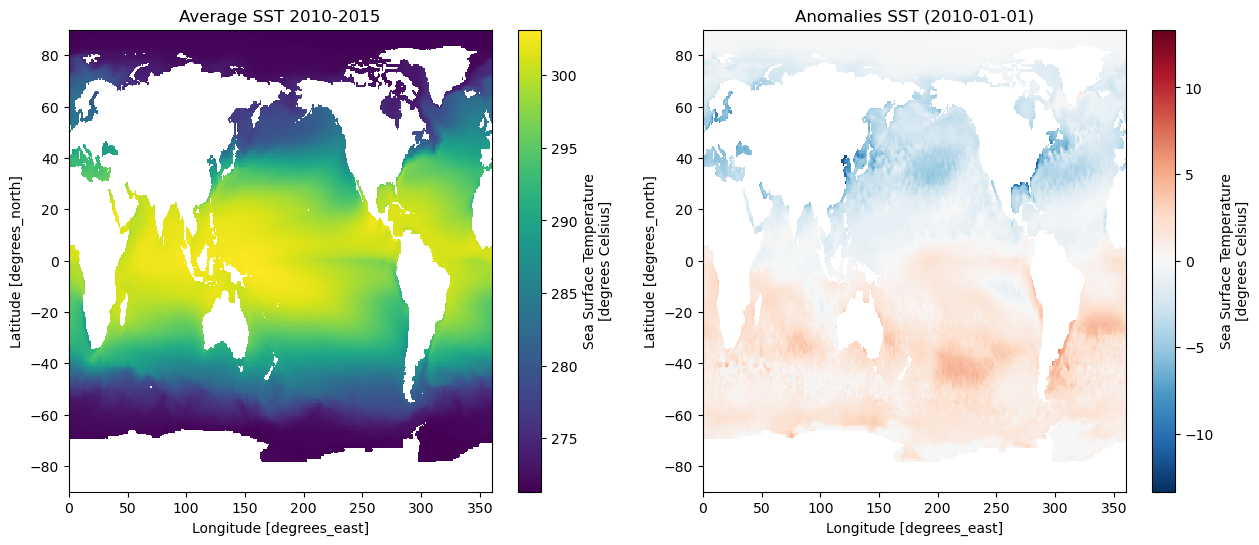

In [10]:
average_sst=sea_surface.sel(time =slice('2010-01-01','2015-12-31')).mean(dim='time')

anomalies_sst = sea_surface - average_sst

fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(15,6))
average_sst.plot(ax=ax1)
ax1.set_title('Average SST 2010-2015')

anomalies_sst.isel(time=0).plot(ax=ax2)
ax2.set_title('Anomalies SST (2010-01-01)')    
plt.show()
                             

# Exercise 4: GroupBy and Resampling
Use groupby to calculate the seasonal mean SST. Group the data by season (DJF, MAM, JJA, and SON) and compute the average SST for each season.

Resample the dataset to compute the monthly mean SST. This aggregates the data on a monthly basis.

Plot the seasonal mean SST and the monthly mean SST to visualize how sea surface temperature varies by season and by month.

This exercise demonstrates how to group and resample time-series data, commonly used in climate data analysis.

d:\Trainings\newgeoenv\Lib\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


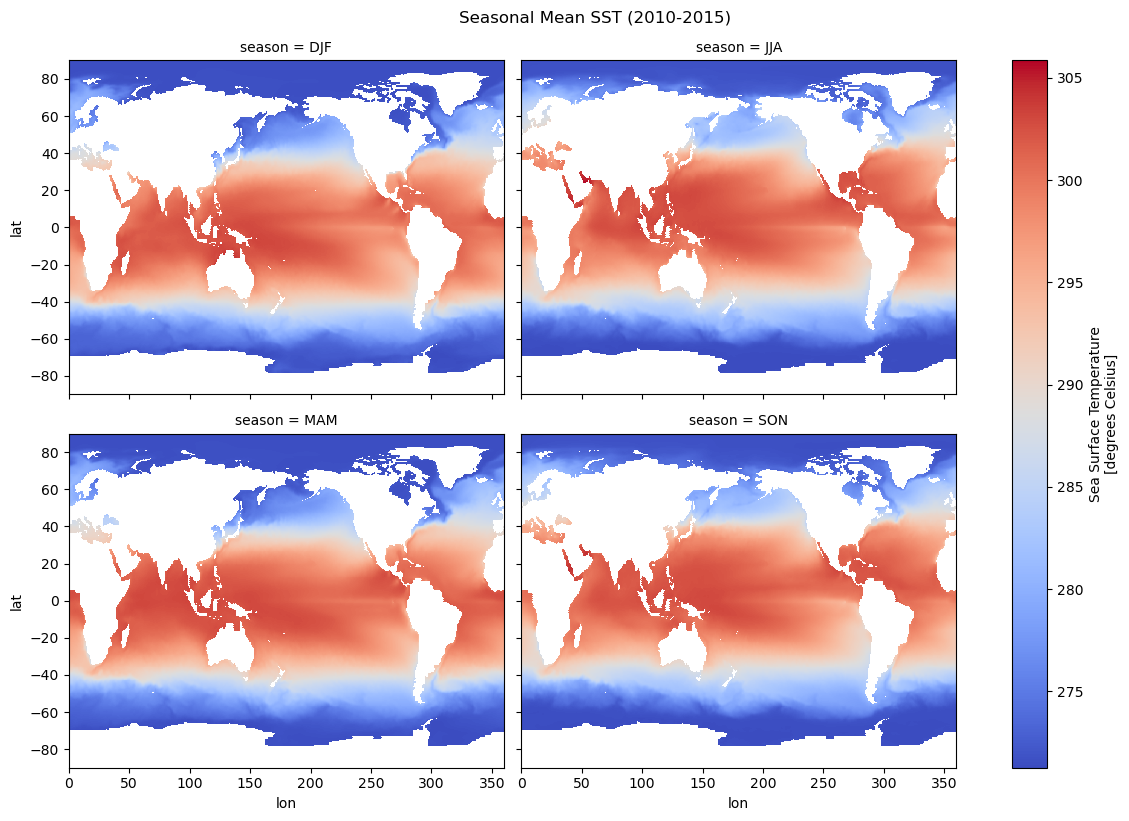

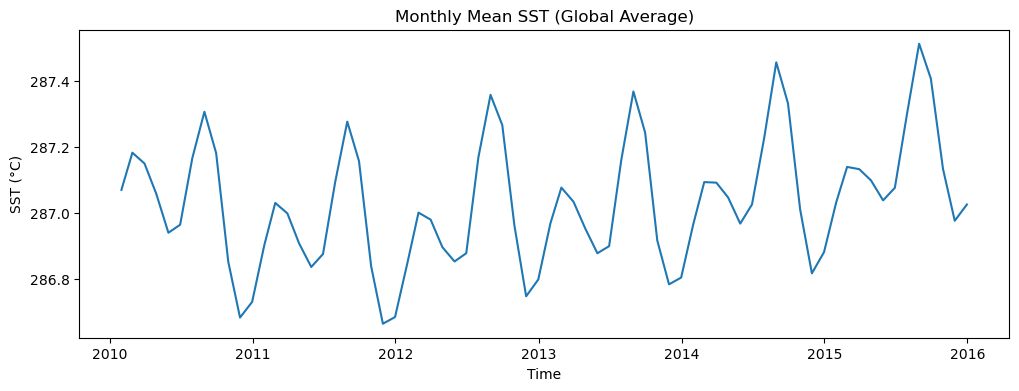

In [209]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Ensure time is in datetime format
sea_surface['time'] = pd.to_datetime(sea_surface['time'])

# 1. Compute seasonal mean SST
seasonal_mean = sea_surface.groupby('time.season').mean()

# 2. Resample to monthly mean SST
monthly_mean = sea_surface.resample(time='1M').mean()

# 3. Plot seasonal mean (faceted maps)
seasonal_mean.plot(col='season', col_wrap=2, cmap='coolwarm', figsize=(12, 8))
plt.suptitle('Seasonal Mean SST (2010-2015)', y=1.02)
plt.show()

# 4. Plot monthly mean (global average time series)
monthly_global_mean = monthly_mean.mean(dim=['lat', 'lon'])
plt.figure(figsize=(12, 4))
monthly_global_mean.plot()
plt.title('Monthly Mean SST (Global Average)')
plt.xlabel('Time')
plt.ylabel('SST (°C)')
plt.show()

# Exercise 5: Writing Data to NetCDF

Select the SST anomalies calculated in Exercise 3 for further analysis and export.
Convert the sst variable to float32 to optimize file size before writing the data to a NetCDF file.
Write the anomalies data to a new NetCDF file named sst_anomalies.nc for storage and future use.
Load the saved NetCDF file back into memory and print its contents to verify the saved data.
This exercise teaches how to export processed geospatial data to NetCDF, a widely-used file format in climate data analysis.

In [12]:
anomalies_sst
# Convert the sst variable to float32 to optimize file size before writing the data to a NetCDF file.

anomalies_sst=anomalies_sst.astype('float32')
anomalies_sst.to_netcdf('sst.nc')

In [13]:
# Load the saved NetCDF file back into memory and print its contents to verify the saved data.
loaded_dataset=xr.load_dataset('sst.nc')
loaded_dataset

<xarray.Dataset> Size: 75MB
Dimensions:  (lon: 720, lat: 360, time: 72)
Coordinates:
  * lon      (lon) float64 6kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat      (lat) float64 3kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 576B 2010-01-01 2010-02-01 ... 2015-12-01
Data variables:
    sst      (time, lat, lon) float32 75MB nan nan nan ... -0.1009 -0.101 -0.101